# Creating the Dataframe
Dataframes are created by using read_csv method which is provided by panda library. A dataframe is a two dimensional data structure which simply contains rows and columns. The given weather dataset created in variable which is type of dataframe.

In [1]:
# import python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, mean_absolute_error
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from keras.optimizers import SGD

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


**Read the dataset** 

In [3]:
# load the dataset and show first 10 records
df_original = pd.read_csv('/content/gdrive/My Drive/data/bank-additional-full.csv',sep=';')
df_original.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
# describe summary
df_original.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


# Handling missing values
In order to do prediction first it is needed to be done data cleansing. As the first step if there is missing values in the data set it is dropped.

In [5]:
# check if there are null values
df_original.isnull().values.any()

False

In [6]:
# get the numerical columns from the dataset
df1 = df_original.select_dtypes(include=np.number)
# get the information about numerical columns
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   duration        41188 non-null  int64  
 2   campaign        41188 non-null  int64  
 3   pdays           41188 non-null  int64  
 4   previous        41188 non-null  int64  
 5   emp.var.rate    41188 non-null  float64
 6   cons.price.idx  41188 non-null  float64
 7   cons.conf.idx   41188 non-null  float64
 8   euribor3m       41188 non-null  float64
 9   nr.employed     41188 non-null  float64
dtypes: float64(5), int64(5)
memory usage: 3.1 MB


#Handling Outliers
To handle outliers we can use boxplots. 
Outliers are values which are staying away from the rest of the datapoints.
Here outliers have been dropped.

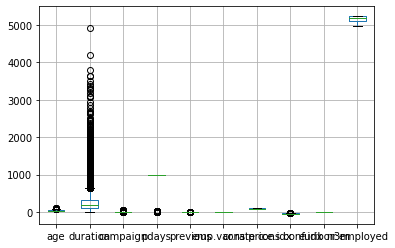

In [7]:
df1.boxplot()

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


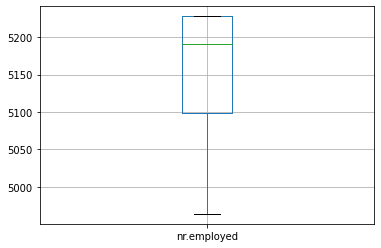

In [8]:
#for each column draw the boxplot
columns = df1.columns
print(columns)
#Check any outliers in the dataset under each feature 
temp_df = pd.DataFrame(df1, columns=[columns[9]])
temp_df.boxplot()

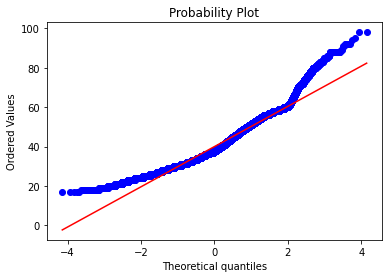

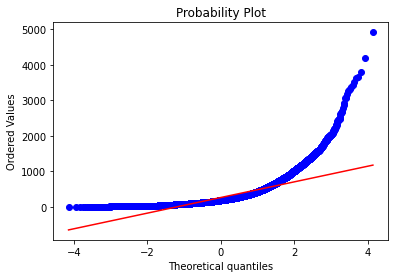

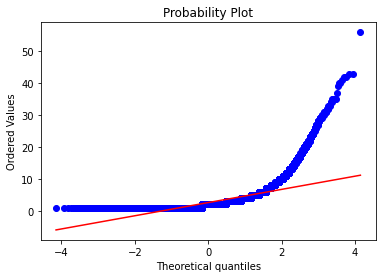

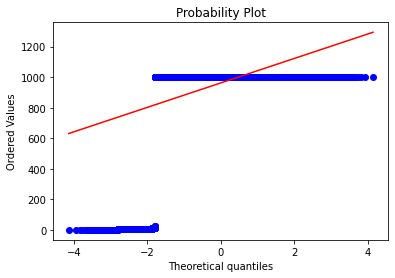

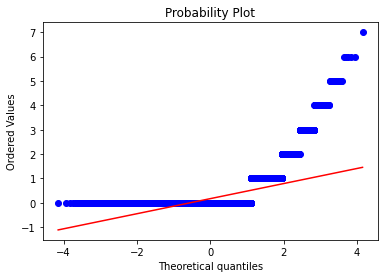

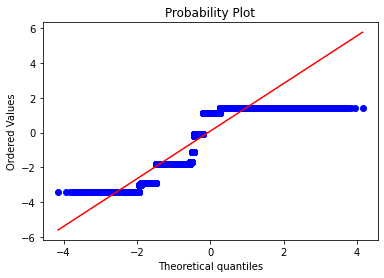

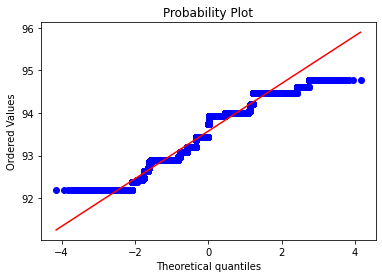

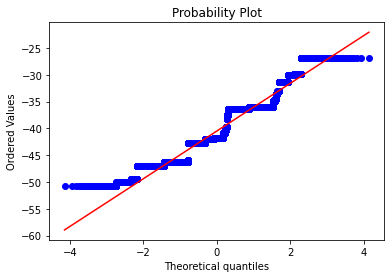

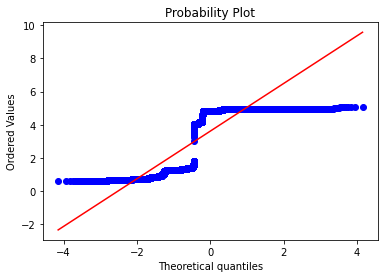

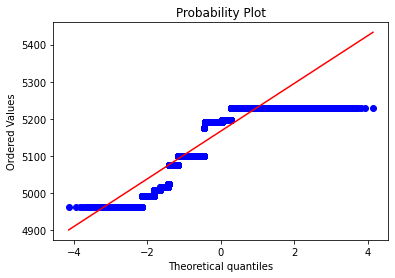

In [9]:
# draw Q-Q plots for df2 features
stats.probplot(df1['age'], dist="norm", plot=plt)
plt.show()
stats.probplot(df1['duration'], dist="norm", plot=plt)
plt.show()
stats.probplot(df1['campaign'], dist="norm", plot=plt)
plt.show()
stats.probplot(df1['pdays'], dist="norm", plot=plt)
plt.show()
stats.probplot(df1['previous'], dist="norm", plot=plt)
plt.show()
stats.probplot(df1['emp.var.rate'], dist="norm", plot=plt)
plt.show()
stats.probplot(df1['cons.price.idx'], dist="norm", plot=plt)
plt.show()
stats.probplot(df1['cons.conf.idx'], dist="norm", plot=plt)
plt.show()
stats.probplot(df1['euribor3m'], dist="norm", plot=plt)
plt.show()
stats.probplot(df1['nr.employed'], dist="norm", plot=plt)
plt.show()

#Data Transformation
To identify wheather Transformation is needed  Q-Q plots and histograms can be used. Then it can be identified weather data points are in normal distribution.
After plotting histograms and Q-Q plots we can see if a feature is right skewed or left skewed.
If a feature is right skewed we use logarithm transformation and if it is left skewed we use exponential transformation to adjust them to a normal distribution.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff7da17b650>,
      dtype=object)

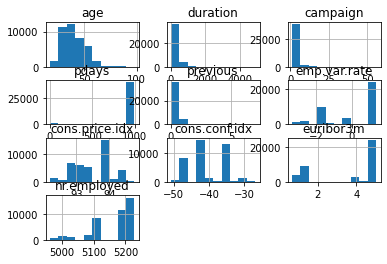

In [10]:
df1.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff7d9aa1c90>,
      dtype=object)

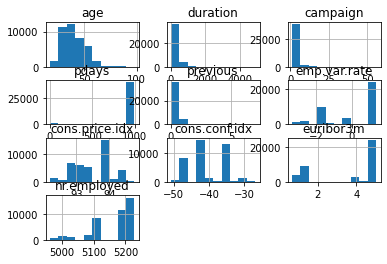

In [11]:
# do the transformations for right skewed features
sqrt_transformer = FunctionTransformer(np.sqrt, validate=True)

columns_to_sqrt = ['age','duration', 'campaign', 'previous']
data = sqrt_transformer.transform(df1[columns_to_sqrt])
df1.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff7d9b0d950>,
      dtype=object)

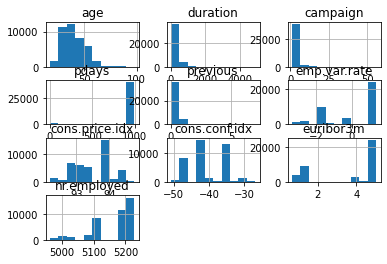

In [12]:
# do the transformations for left skewed features
squared_transformer = FunctionTransformer(lambda x: x**2, validate=True)

columns_to_squared = ['nr.employed']
data = squared_transformer.transform(df1[columns_to_squared])
df1.hist()

# Feature Coding
The purpose of feature coding is to convert categorical text data to numerical values. Here we have two methods,
One-hot encoding
Lable encoding
In one-hot encoding we use vectors and in label-encoding we use integers as labels.
One hot encoding is best when there are one or two categories. But it is difficult to use onehot encoding when new feature are added to the data set. Label encoding is useful if there are many categories it is also a popular way of feature coding.

In [13]:
# identify the categorical columns
df2 = df_original.select_dtypes(exclude=np.number)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   job          41188 non-null  object
 1   marital      41188 non-null  object
 2   education    41188 non-null  object
 3   default      41188 non-null  object
 4   housing      41188 non-null  object
 5   loan         41188 non-null  object
 6   contact      41188 non-null  object
 7   month        41188 non-null  object
 8   day_of_week  41188 non-null  object
 9   poutcome     41188 non-null  object
 10  y            41188 non-null  object
dtypes: object(11)
memory usage: 3.5+ MB


In [14]:
# do the one hot encoder to categorical features
df2_cols = df2.columns
df2_cols = df2_cols.drop('y')
onehot_encoder = OneHotEncoder(handle_unknown='ignore')
onehot_encoder.fit(df2[df2_cols])
coded_column_names = onehot_encoder.get_feature_names(df2_cols)

onehot_encoder_df = pd.DataFrame(onehot_encoder.transform(df2[df2_cols]).toarray(),columns=coded_column_names)
df2 = df2.join(onehot_encoder_df)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 64 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   job                            41188 non-null  object 
 1   marital                        41188 non-null  object 
 2   education                      41188 non-null  object 
 3   default                        41188 non-null  object 
 4   housing                        41188 non-null  object 
 5   loan                           41188 non-null  object 
 6   contact                        41188 non-null  object 
 7   month                          41188 non-null  object 
 8   day_of_week                    41188 non-null  object 
 9   poutcome                       41188 non-null  object 
 10  y                              41188 non-null  object 
 11  job_admin.                     41188 non-null  float64
 12  job_blue-collar                41188 non-null 

In [15]:
# drop the categorical columns from df2 dataframe
df2.drop(df2_cols, axis=1, inplace=True)
df2.head(10)

,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,no,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,no,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6,no,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7,no,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
9,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [16]:
# declare the final datadframe after joining df1 and df2
df3 = df2.join(df1)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 64 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   y                              41188 non-null  object 
 1   job_admin.                     41188 non-null  float64
 2   job_blue-collar                41188 non-null  float64
 3   job_entrepreneur               41188 non-null  float64
 4   job_housemaid                  41188 non-null  float64
 5   job_management                 41188 non-null  float64
 6   job_retired                    41188 non-null  float64
 7   job_self-employed              41188 non-null  float64
 8   job_services                   41188 non-null  float64
 9   job_student                    41188 non-null  float64
 10  job_technician                 41188 non-null  float64
 11  job_unemployed                 41188 non-null  float64
 12  job_unknown                    41188 non-null 

In [17]:
# drop the 'y' column before apply the coding for categorical features
df_features = df3.drop('y',axis=1)
target = pd.DataFrame(df3['y'], columns=["y"])
# apply the coding
target['y'] = target['y'].astype('category').cat.codes

#Train-test Split
Before continuing with the rest lets split the whole dataset into a training dataset and testing dataset.
The feature that we are supposed to predict should also be splitted from the rest of the data set. In our case this will be 'y'.

In [25]:
# split into train and test datasets
x_train, x_test, y_train, y_test = train_test_split(df_features, target, test_size = 0.2, random_state = 100)
x_train=x_train.reset_index(drop=True)
x_test=x_test.reset_index(drop=True)
y_train=y_train.reset_index(drop=True)
y_test=y_test.reset_index(drop=True)

# Feature Scaling
Scaling is done to make mean=0 and standard deviation=1.
We should not scale categorical variables.

In [27]:
# scaling
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
campaign,1.000000,0.054911,-0.079952,0.151579,0.129611,-0.012803,0.135518,0.144108,-0.068265
pdays,0.054911,1.000000,-0.588395,0.273411,0.082837,-0.090080,0.298664,0.372366,-0.325500
previous,-0.079952,-0.588395,1.000000,-0.421555,-0.201621,-0.053945,-0.456222,-0.503021,0.233819
emp.var.rate,0.151579,0.273411,-0.421555,1.000000,0.774387,0.200666,0.972175,0.906536,-0.304397
cons.price.idx,0.129611,0.082837,-0.201621,0.774387,1.000000,0.064422,0.686706,0.519393,-0.140847
cons.conf.idx,-0.012803,-0.090080,-0.053945,0.200666,0.064422,1.000000,0.281674,0.104406,0.054015
euribor3m,0.135518,0.298664,-0.456222,0.972175,0.686706,0.281674,1.000000,0.945049,-0.312671
nr.employed,0.144108,0.372366,-0.503021,0.906536,0.519393,0.104406,0.945049,1.000000,-0.358646
y,-0.068265,-0.325500,0.233819,-0.304397,-0.140847,0.054015,-0.312671,-0.358646,1.000000


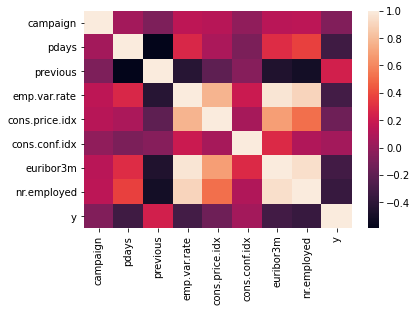

In [28]:
# draw the correlation matrix
correlation_matrix = pd.concat([x_train.iloc[:,55:], y_train], axis=1).corr()
sns.heatmap(correlation_matrix)
correlation_matrix

In [ ]:
df_features = df_features.drop('euribor3m', 1) #delete 

# Dimensionality reduction
For dimentionality reduction Principal Component Analysis (PCA) or Singular
Value Decomposition (SVD) can be used.
Here I have used PCA.
PCA projects the dimensions in a dataset to a eigen vector space. 
Then we can get the variance ratio to decide which features are to be dropped.

In [ ]:
# apply the PCA for feature for feature reduction
pca = PCA()
pca.fit(x_train)
pca.explained_variance_ratio_

array([6.30026112e-01, 3.28222694e-01, 4.04290990e-02, 1.01009302e-03,
       1.87603551e-04, 6.85675736e-05, 7.59728057e-06, 4.42675998e-06,
       4.05229653e-06, 3.18606326e-06, 2.88239889e-06, 2.57080239e-06,
       2.44670621e-06, 2.38896713e-06, 2.32366053e-06, 2.06012601e-06,
       1.96365590e-06, 1.90459764e-06, 1.81368368e-06, 1.80521593e-06,
       1.74169147e-06, 1.30760860e-06, 1.22939340e-06, 1.14229791e-06,
       1.06299874e-06, 8.39144368e-07, 7.47318274e-07, 6.78142811e-07,
       6.30896713e-07, 6.07230872e-07, 5.99976641e-07, 4.96406599e-07,
       4.32378979e-07, 4.12119572e-07, 3.91011443e-07, 3.18174808e-07,
       2.98159359e-07, 2.42384419e-07, 2.22460791e-07, 2.18860042e-07,
       1.71651512e-07, 1.54751662e-07, 1.42351972e-07, 1.12096436e-07,
       7.45321788e-08, 4.34756380e-08, 4.15900070e-08, 2.46910719e-08,
       1.96460462e-08, 4.77267287e-09, 8.36161803e-10, 3.34788991e-33,
       3.34788991e-33, 3.34788991e-33, 3.34788991e-33, 3.34788991e-33,
      

In [29]:
pca = PCA(n_components=4)
pca.fit(x_train)
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
svc = svm.SVC(kernel='rbf', C=1.2, gamma=0.5).fit(x_train_pca, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [35]:
predictions = svc.predict(x_test_pca)
y_hat = pd.DataFrame(predictions, columns=["predicted"])
print(y_hat.head(10)) 

   predicted
0          0
1          0
2          0
3          0
4          0
5          0
6          0
7          0
8          0
9          0


In [36]:
from sklearn.metrics import accuracy_score 
print('SVM accuracy score for test: %.3f' % (
        accuracy_score(y_test, y_hat)))

SVM accuracy score for test: 0.889


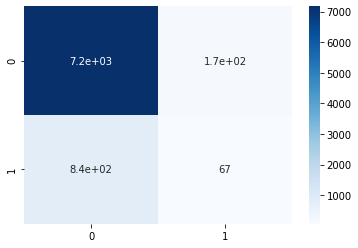

In [33]:
# draw the confusion matrix
cnf_matrix = confusion_matrix(y_test, predictions)
fig, ax = plt.subplots(1)
ax = sns.heatmap(cnf_matrix, ax=ax, cmap=plt.cm.Blues, annot=True)
plt.show()